### Analyzing and modeling the ATP data to predict what it takes to be best tennis player

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 


In [2]:
#reading the csv file from the jupyter notebook 

df= pd.read_csv('tennis_stats.csv')

In [3]:
df.head()

,Player,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,...,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
0,Pedro Sousa,2016,0.88,0.50,0.38,0.50,0.39,0,0.14,7,...,0.11,0.38,8,0.50,0.43,0.50,1,2,39820,119
1,Roman Safiullin,2017,0.84,0.62,0.26,0.33,0.07,7,0.00,7,...,0.00,0.20,9,0.67,0.41,0.57,0,1,17334,381
2,Pedro Sousa,2017,0.83,0.60,0.28,0.53,0.44,2,0.38,10,...,0.16,0.34,17,0.65,0.45,0.59,4,1,109827,119
3,Rogerio Dutra Silva,2010,0.83,0.64,0.34,0.59,0.33,2,0.33,5,...,0.14,0.34,15,0.80,0.49,0.63,0,0,9761,125
4,Daniel Gimeno-Traver,2017,0.81,0.54,0.00,0.33,0.33,1,0.00,2,...,0.00,0.20,2,0.50,0.35,0.50,0,1,32879,272


### Performing Exploratory Data Analysis by plotting various features

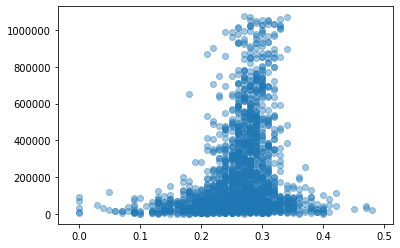

In [5]:
plt.scatter(df['FirstServeReturnPointsWon'],df['Winnings'],alpha=0.4);

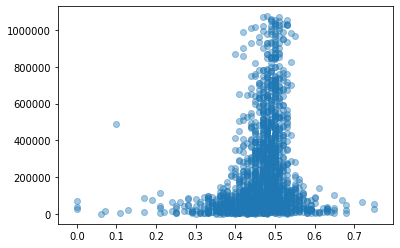

In [6]:
plt.scatter(df['SecondServeReturnPointsWon'],df['Winnings'],alpha=0.4);

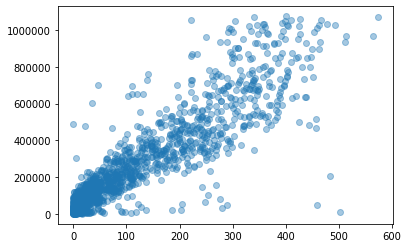

In [9]:
#shows strong correlation as datapoints are moving in the same direction

plt.scatter(df['BreakPointsOpportunities'],df['Winnings'],alpha=0.4);

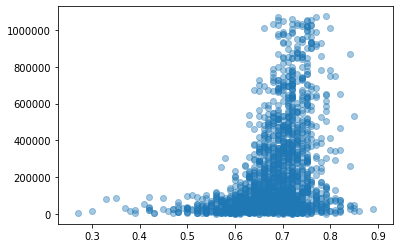

In [10]:
plt.scatter(df['FirstServePointsWon'],df['Winnings'],alpha=0.4);

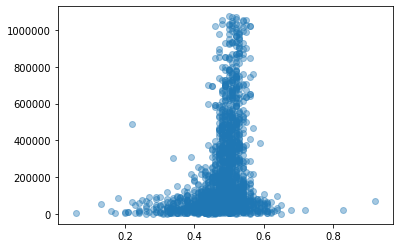

In [11]:
plt.scatter(df['SecondServePointsWon'],df['Winnings'],alpha=0.4);

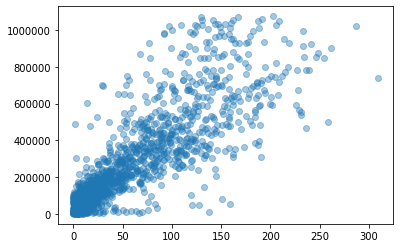

In [13]:
plt.scatter(df['DoubleFaults'],df['Winnings'],alpha=0.4);

In [14]:
x=df['DoubleFaults']

In [15]:
print(x)

0       2
1       1
2       1
3       0
4       2
       ..
1716    7
1717    3
1718    4
1719    1
1720    7
Name: DoubleFaults, Length: 1721, dtype: int64


In [16]:
y=df['Winnings']

In [18]:
print(y)

0        39820
1        17334
2       109827
3         9761
4        32879
         ...  
1716      9117
1717     89755
1718     44566
1719     17527
1720      8869
Name: Winnings, Length: 1721, dtype: int64


### Performing train test split

In [136]:
from sklearn.model_selection import train_test_split

In [137]:
from sklearn.linear_model import LinearRegression

In [21]:
x=x.values.reshape(-1,1)

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,test_size=0.2)

## Building and training our Linear Regression model using single feature

In [23]:
lr1 = LinearRegression()

In [25]:
# Training our Linear Regression model 

lr1.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
lr1.score(x_test,y_test)

0.7179184675167036

In [28]:
y_predict=lr1.predict(x_test)

Text(0, 0.5, 'Predicted Outcome')

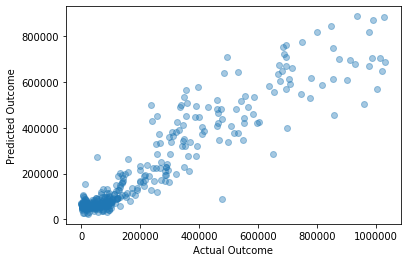

In [165]:
#plotting the actual values of y VS the predicted values of y

plt.scatter(y_test,y_predict,alpha=0.4);
plt.xlabel('Actual Outcome')
plt.ylabel('Predicted Outcome')

### Creating second Linear Regression model 

In [33]:
lr2 = LinearRegression()

In [34]:
x = df['BreakPointsOpportunities']
y = df['Winnings']

In [35]:
x=x.values.reshape(-1,1)

In [36]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8)

In [37]:
lr2.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
lr2.score(x_test,y_test)

0.778477297327838

In [40]:
y_predict = lr2.predict(x_test)

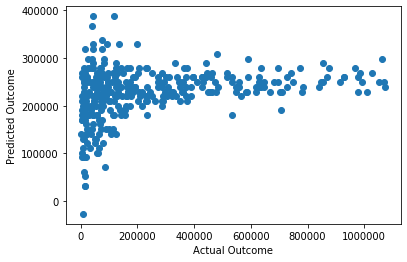

<Figure size 432x288 with 0 Axes>

In [146]:
plt.scatter(y_test,y_predict);
plt.xlabel('Actual Outcome')
plt.ylabel('Predicted Outcome')
plt.show()
plt.clf()


### Creating third regression model using single feature

In [53]:
x=df['FirstServeReturnPointsWon']
print(x)

0       0.38
1       0.26
2       0.28
3       0.34
4       0.00
        ... 
1716    0.23
1717    0.30
1718    0.21
1719    0.15
1720    0.40
Name: FirstServeReturnPointsWon, Length: 1721, dtype: float64


In [45]:
y=df['Winnings']

In [46]:
lr3 = LinearRegression()

In [56]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8)

In [54]:
x=x.values.reshape(-1,1)

In [57]:
lr3.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [58]:
lr3.score(x_test,y_test)

0.07856223969488174

In [59]:
y_predict = lr3.predict(x_test)

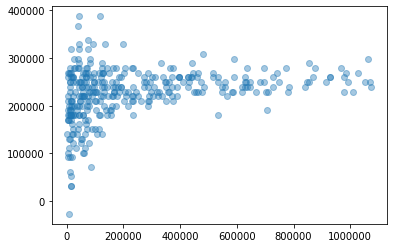

In [62]:
plt.scatter(y_test,y_predict,alpha=0.4);

### lr2 regression model is better in comparison to other two as its model performance is better

# Applying Multiple Linear Regression

In [161]:
# x=input y=outcome
x = df[['FirstServeReturnPointsWon','BreakPointsOpportunities']]
y = df[['Winnings']]

In [148]:
print(x)

      FirstServeReturnPointsWon  BreakPointsOpportunities
0                          0.38                         7
1                          0.26                         0
2                          0.28                         8
3                          0.34                         6
4                          0.00                         0
...                         ...                       ...
1716                       0.23                         4
1717                       0.30                         5
1718                       0.21                         4
1719                       0.15                         5
1720                       0.40                         9

[1721 rows x 2 columns]


In [149]:
#performing train test split 
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8)

In [150]:
#creating Linear Regression model
mlr = LinearRegression()

In [151]:
#training our Linear Model
mlr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [153]:
#checking for the models performance accuracy
mlr.score(x_test,y_test)

0.8581235099545514

In [154]:
#predicting the outcome
y_predict = mlr.predict(x_test)

Text(0, 0.5, 'Predicted Outcome')

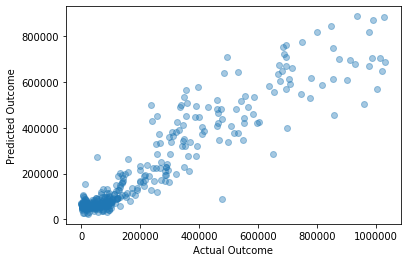

In [160]:
#plotting the actual outcome vs predicted outcome
plt.scatter(y_test,y_predict,alpha=0.4);
plt.xlabel('Actual Outcome')
plt.ylabel('Predicted Outcome')

## Creating second Linear Regression model using multiple features

In [182]:
x = df[['FirstServe','FirstServePointsWon','FirstServeReturnPointsWon',
            'SecondServePointsWon','SecondServeReturnPointsWon',
           'BreakPointsOpportunities','ReturnGamesPlayed','ReturnPointsWon']
          ]




In [187]:
y=df[['Winnings']]

In [188]:
print(y)


      Winnings
0        39820
1        17334
2       109827
3         9761
4        32879
...        ...
1716      9117
1717     89755
1718     44566
1719     17527
1720      8869

[1721 rows x 1 columns]


### Performing train test split

In [189]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8)

## Creating Linear Regression model 

In [190]:
mlr2 = LinearRegression()

In [191]:
#Training our Linear Model 

mlr2.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [192]:
print(mlr2.score(x_test,y_test))

0.8574111652467559


In [193]:
y_predict=mlr2.predict(x_test)

## Plotting the actual winnings VS predicted Winnings

Text(0, 0.5, 'Predicted Winnings')

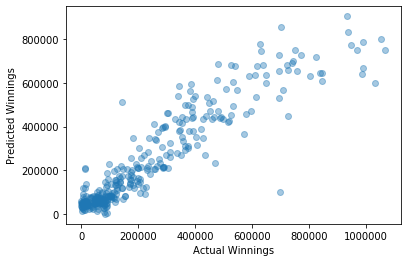

In [197]:
plt.scatter(y_test,y_predict,alpha=0.4);
plt.xlabel('Actual Winnings')
plt.ylabel('Predicted Winnings')


### Both the Multiple regression models have same accuracy